<h1>Problem Set 3</h1> 
<h3><center>Quantitative Macro</center></h3>

<center>Pau Belda-i-Tortosa</center>,

<center>October 2018</center>

<h3>Question 1: GE with Labor Supply, Uncertainty, and Progressive Labor Income Tax.</h3>

By plugging the budget constraints in the objective function, we get a problem with one inequality constraint (the borrowing constraint) and three controls (h, h', a). To get an identified system of equations we have to use the 3 FOC and an additional non-debt-when-die condition. With that, we have a system of equations for each individual. We can add two more variables (consumption today and tomorrow) and two more constraints (the budget constraints) to get all the variables we are interested in. 

Since we have 100 different initial wealth level and 4 levels of permanent productivity, we have 400 agents. Each one will receive a transitory productivity shock in the second period. Then, we have to solve 400 system of equations (one per each triple ($y_{0_i}$, $\eta_i$, $\epsilon_i$) and get a matrix of 400 (individuals) x 4 (variables). Moreover, we will play with $r$ the ensure that asset market is in zero net supply. 

**Definition of the General Equilibrium**
A General equilibrium is a sequence of prices ($r_t$,$w_t$) and a sequence of allocations ($c_t, c_{t+1}, a_t, h_t, h_{t+1}$) that, for all periods, given prices:
- Allocations solve the utility maximization problems.
- Asset market is in net zero supply.
- The excess of demand of the good market is zero. 
- The government budget has zero deficit. 

In [12]:
#Import packages
import numpy as np
from numpy import *
from scipy.optimize import *
from itertools import product
import matplotlib.pyplot as plt

#Fix the seed
random.seed(10)

#DISTRIBUTION 
eta=[1, 1.5, 2.5, 3]
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps = np.array(eps)
y0 = np.random.uniform(0.001,0.009,100)
for (i, item) in enumerate(y0):
    if 0.0055<item<0.0087:
        y0[i] = 0.001
y0=np.asarray(y0)
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps =np.array(eps)

## SYSTEM OF EQUATIONS (for eta=1)
solution1=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1
            r=0.65625
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution1.append(x)
    sol_mat=np.matrix(solution1)

assets_1=sol_mat[:,0]
c0_1=sol_mat[:,4]
c1_1=sol_mat[:,5]
h0_1=sol_mat[:,1]
h1_1=sol_mat[:,2]
sum(assets_1)
print(sum(assets_1))
print ('Zero net supply condition is satisfied')


0.0007024643319665834
Zero net supply condition is satisfied


In [13]:
#SYSTEM OF EQUATIONS (for eta=1.5)

solution2=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1.5
            r=0.64333
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution2.append(x)
    sol_mat=np.matrix(solution2)

assets_2=sol_mat[:,0]
c0_2=sol_mat[:,4]
c1_2=sol_mat[:,5]
h0_2=sol_mat[:,1]
h1_2=sol_mat[:,2]
sum(assets_2)
print(sum(assets_2))
print ('Zero net supply condition is satisfied')

Zero net supply condition is satisfied


In [14]:
#SYSTEM OF EQUATIONS (for eta=2.5)

solution3=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=2.5
            r=0.63345
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution3.append(x)
    sol_mat=np.matrix(solution3)

assets_3=sol_mat[:,0]
c0_3=sol_mat[:,4]
c1_3=sol_mat[:,5]
h0_3=sol_mat[:,1]
h1_3=sol_mat[:,2]
sum(assets_3)
print(sum(assets_3))
print ('Zero net supply condition is satisfied')

0.0009995750463263758
Zero net supply condition is satisfied


In [15]:
#SYSTEM OF EQUATIONS (for eta=3)
solution4=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=3
            r=0.63105
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution4.append(x)
    sol_mat=np.matrix(solution4)

assets_4=sol_mat[:,0]
c0_4=sol_mat[:,4]
c1_4=sol_mat[:,5]
h0_4=sol_mat[:,1]
h1_4=sol_mat[:,2]
sum(assets_4)
print(sum(assets_4))
print ('Zero net supply condition is satisfied')

0.0011808255901690839
Zero net supply condition is satisfied


Now, we plot the solutions the see how the economy works. 

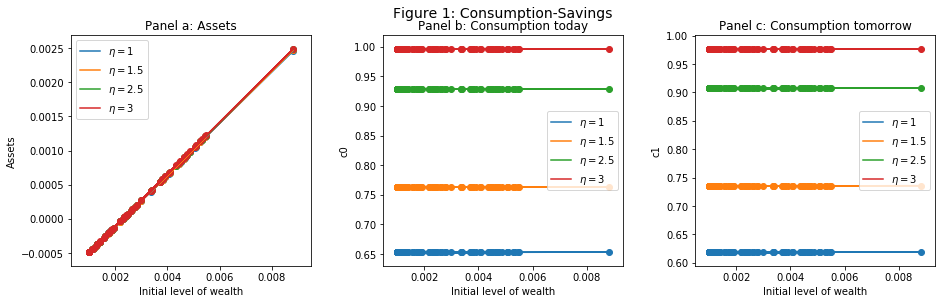

In [6]:
#PLOT
# Convert every output in an array
y0=np.asarray(y0)
assets_1=np.asarray(assets_1)
assets_2=np.asarray(assets_2)
assets_3=np.asarray(assets_3)
assets_4=np.asarray(assets_4)
c0_1=np.asarray(c0_1)
c0_2=np.asarray(c0_2)
c0_3=np.asarray(c0_3)
c0_4=np.asarray(c0_4)
c1_1=np.asarray (c1_1)
c1_2=np.asarray (c1_2)
c1_3=np.asarray (c1_3)
c1_4=np.asarray (c1_4)
h0_1=np.asarray(h0_1)
h0_2=np.asarray(h0_2)
h0_3=np.asarray(h0_3)
h0_4=np.asarray(h0_4)
h1_1=np.asarray(h1_1)
h1_2=np.asarray(h1_2)
h1_3=np.asarray(h1_3)
h1_4=np.asarray(h1_4)

plt.figure(1)
plt.suptitle('Figure 1: Consumption-Savings', x=1, y=1, fontsize=14)

plt.subplot(131)
plt.plot(y0, assets_1, label='$\eta=1$')
plt.plot(y0, assets_2, label='$\eta=1.5$')
plt.plot(y0, assets_3, label='$\eta=2.5$')
plt.plot(y0, assets_4, label='$\eta=3$')
plt.scatter(y0,assets_1)
plt.scatter(y0,assets_2)
plt.scatter(y0,assets_3)
plt.scatter(y0,assets_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('Assets')
plt.title('Panel a: Assets')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, c0_1, label='$\eta=1$')
plt.plot(y0, c0_2, label='$\eta=1.5$')
plt.plot(y0, c0_3, label='$\eta=2.5$')
plt.plot(y0, c0_4, label='$\eta=3$')
plt.scatter(y0,c0_1)
plt.scatter(y0,c0_2)
plt.scatter(y0,c0_3)
plt.scatter(y0,c0_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('c0')
plt.title('Panel b: Consumption today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(133)
plt.plot(y0, c1_1, label='$\eta=1$')
plt.plot(y0, c1_2, label='$\eta=1.5$')
plt.plot(y0, c1_3, label='$\eta=2.5$')
plt.plot(y0, c1_4, label='$\eta=3$')
plt.scatter(y0,c1_1)
plt.scatter(y0,c1_2)
plt.scatter(y0,c1_3)
plt.scatter(y0,c1_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('c1')
plt.title('Panel c: Consumption tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)
             
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

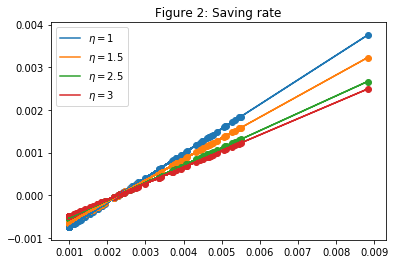

In [7]:
#Get the savings
#eta=1
savings_1=[]
for i in range(0,100) :
    eta=1
    s_1 = assets_1[i]/(y0[i]+eta*h0_1[i])
    savings_1.append(s_1)

#eta=1.5
savings_2=[]
for i in range(0,100) :
    eta=1.5
    s_2 = assets_2[i]/(y0[i]+eta*h0_2[i])
    savings_2.append(s_2)

#eta=2.5
savings_3=[]
for i in range(0,100) :
    eta=2.5
    s_3 = assets_3[i]/(y0[i]+eta*h0_3[i])
    savings_3.append(s_3)
    
#eta=3
savings_4=[]
for i in range(0,100) :
    eta=3
    s_4 = assets_4[i]/(y0[i]+eta*h0_4[i])
    savings_4.append(s_4)

#PLOT

plt.plot(y0, savings_1, label='$\eta=1$')
plt.plot(y0, savings_2, label='$\eta=1.5$')
plt.plot(y0, savings_3, label='$\eta=2.5$')
plt.plot(y0, savings_4, label='$\eta=3$')
plt.scatter(y0,savings_1)
plt.scatter(y0,savings_2)
plt.scatter(y0,savings_3)
plt.scatter(y0,savings_4)
plt.title('Figure 2: Saving rate')
plt.legend()



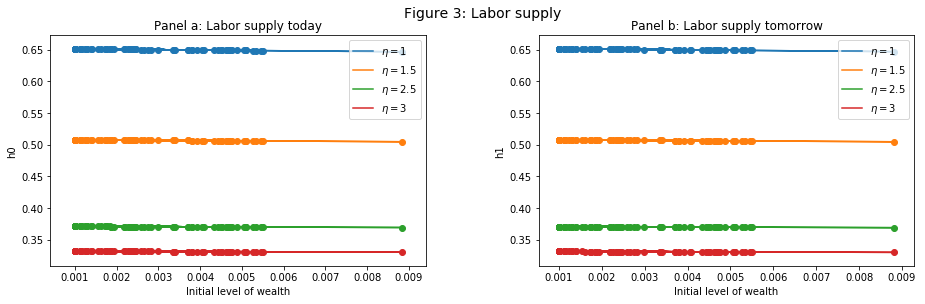

In [8]:
#OPTIMAL HOURS WORKED
plt.figure(1)
plt.suptitle('Figure 3: Labor supply', x=1, y=1, fontsize=14)

plt.subplot(121)
plt.plot(y0, h0_1, label='$\eta=1$')
plt.plot(y0, h0_2, label='$\eta=1.5$')
plt.plot(y0, h0_3, label='$\eta=2.5$')
plt.plot(y0, h0_4, label='$\eta=3$')
plt.scatter(y0,h0_1)
plt.scatter(y0,h0_2)
plt.scatter(y0,h0_3)
plt.scatter(y0,h0_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('h0')
plt.title('Panel a: Labor supply today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(122)
plt.plot(y0, h1_1, label='$\eta=1$')
plt.plot(y0, h1_2, label='$\eta=1.5$')
plt.plot(y0, h1_3, label='$\eta=2.5$')
plt.plot(y0, h1_4, label='$\eta=3$')
plt.scatter(y0,h1_1)
plt.scatter(y0,h1_2)
plt.scatter(y0,h1_3)
plt.scatter(y0,h1_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('h1')
plt.title('Panel b: Labor supply tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

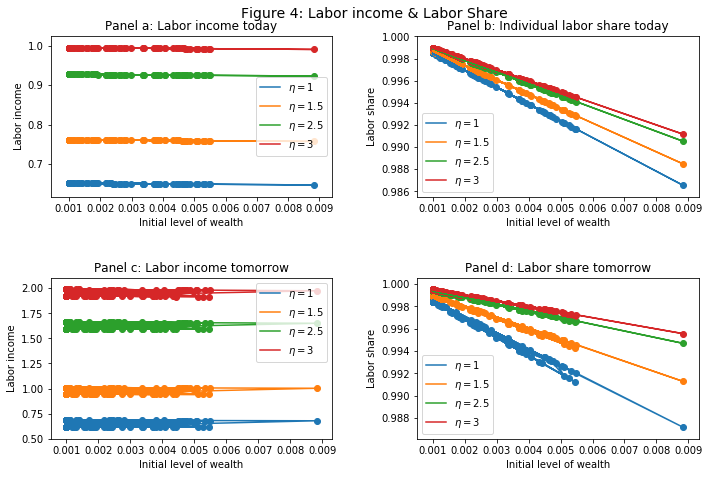

In [9]:
# LABOR INCOME

# LABOR INCOME AND LABOR SHARE TODAY
#eta=1
li_1=[]
ls_1=[]
for i in range(0,100) :
    eta=1
    li = eta*h0_1[i]
    ls=eta*h0_1[i]/(eta*h0_1[i]+y0[i])
    li_1.append(li)
    ls_1.append(ls)

#eta=1.5
li_2=[]
ls_2=[]
for i in range(0,100) :
    eta=1.5
    li = eta*h0_2[i]
    ls=eta*h0_2[i]/(eta*h0_2[i]+y0[i])
    li_2.append(li)
    ls_2.append(ls)

#eta=2.5
li_3=[]
ls_3=[]
for i in range(0,100) :
    eta=2.5
    li = eta*h0_3[i]
    ls=eta*h0_3[i]/(eta*h0_3[i]+y0[i])
    li_3.append(li)
    ls_3.append(ls)
    
#eta=3
li_4=[]
ls_4=[]
for i in range(0,100) :
    eta=3
    li = eta*h0_4[i]
    ls=eta*h0_4[i]/(eta*h0_4[i]+y0[i])
    li_4.append(li)
    ls_4.append(ls)

#LABOR INCOME AND LABOR SHARE TOMORROW
#eta=1
LI_1=[]
LS_1=[]
for i in range(0,100) :
        eta=1
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_1.append(li)
        LS_1.append(ls)

#eta=1.5
LI_2=[]
LS_2=[]
for i in range(0,100) :
        eta=1.5
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_2.append(li)
        LS_2.append(ls)

#eta=2.5
LI_3=[]
LS_3=[]
for i in range(0,100) :
        eta=2.5
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_3.append(li)
        LS_3.append(ls)

#eta=3
LI_4=[]
LS_4=[]
for i in range(0,100) :
        eta=3
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_4.append(li)
        LS_4.append(ls)


#PLOT
plt.figure(1)
plt.suptitle('Figure 4: Labor income & Labor Share', x=0.75, y=1, fontsize=14)

plt.subplot(221)
plt.plot(y0, np.reshape(li_1,[100]), label='$\eta=1$')
plt.plot(y0, np.reshape(li_2,[100]), label='$\eta=1.5$')
plt.plot(y0, np.reshape(li_3,[100]), label='$\eta=2.5$')
plt.plot(y0, np.reshape(li_4,[100]), label='$\eta=3$')
plt.scatter(y0,np.reshape(li_1,[100]))
plt.scatter(y0,np.reshape(li_2,[100]))
plt.scatter(y0,np.reshape(li_3,[100]))
plt.scatter(y0,np.reshape(li_4,[100]))
plt.xlabel('Initial level of wealth')
plt.ylabel('Labor income')
plt.title('Panel a: Labor income today')
plt.legend()
plt.subplots_adjust(top=1, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.3)

plt.subplot(222)
plt.plot(y0, np.reshape(ls_1,[100]), label='$\eta=1$')
plt.plot(y0, np.reshape(ls_2,[100]), label='$\eta=1.5$')
plt.plot(y0, np.reshape(ls_3,[100]), label='$\eta=2.5$')
plt.plot(y0, np.reshape(ls_4,[100]), label='$\eta=3$')
plt.scatter(y0,np.reshape(ls_1,[100]))
plt.scatter(y0,np.reshape(ls_2,[100]))
plt.scatter(y0,np.reshape(ls_3,[100]))
plt.scatter(y0,np.reshape(ls_4,[100]))
plt.xlabel('Initial level of wealth')
plt.ylabel('Labor share')
plt.title('Panel b: Individual labor share today')
plt.legend()
plt.subplots_adjust(top=1, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.3)

plt.subplot(223)
plt.plot(y0, np.reshape(LI_1,[100]), label='$\eta=1$')
plt.plot(y0, np.reshape(LI_2,[100]), label='$\eta=1.5$')
plt.plot(y0, np.reshape(LI_3,[100]), label='$\eta=2.5$')
plt.plot(y0, np.reshape(LI_4,[100]), label='$\eta=3$')
plt.scatter(y0,np.reshape(LI_1,[100]))
plt.scatter(y0,np.reshape(LI_2,[100]))
plt.scatter(y0,np.reshape(LI_3,[100]))
plt.scatter(y0,np.reshape(LI_4,[100]))
plt.xlabel('Initial level of wealth')
plt.ylabel('Labor income')
plt.title('Panel c: Labor income tomorrow')
plt.legend()
plt.subplots_adjust(top=1, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.3)


plt.subplot(224)
plt.plot(y0, np.reshape(LS_1,[100]), label='$\eta=1$')
plt.plot(y0, np.reshape(LS_2,[100]), label='$\eta=1.5$')
plt.plot(y0, np.reshape(LS_3,[100]), label='$\eta=2.5$')
plt.plot(y0, np.reshape(LS_4,[100]), label='$\eta=3$')
plt.scatter(y0,np.reshape(LS_1,[100]))
plt.scatter(y0,np.reshape(LS_2,[100]))
plt.scatter(y0,np.reshape(LS_3,[100]))
plt.scatter(y0,np.reshape(LS_4,[100]))
plt.xlabel('Initial level of wealth')
plt.ylabel('Labor share')
plt.title('Panel d: Labor share tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=-0.5, left=0, right=1.5, hspace=0.5, wspace=0.3)

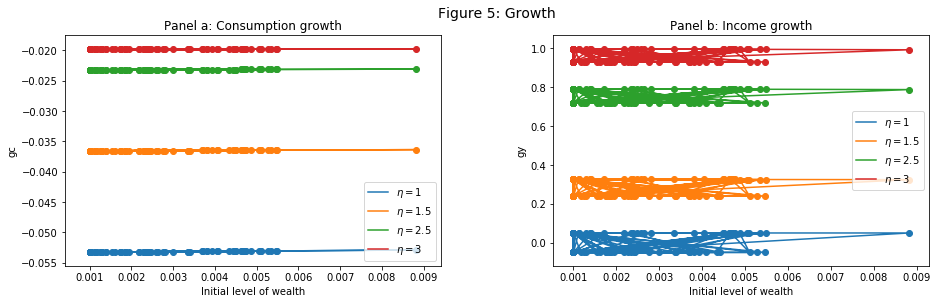

In [10]:
#CONSUMPTION GROWTH
#eta=1
growth_1=[]
for i in range(0,100):
    g= (c1_1[i]-c0_1[i])/c0_1[i]
    growth_1.append(g)

#eta=1.5
growth_2=[]
for i in range(0,100):
    g= (c1_2[i]-c0_2[i])/c0_2[i]
    growth_2.append(g)
    
#eta=2.5
growth_3=[]
for i in range(0,100):
    g= (c1_3[i]-c0_3[i])/c0_3[i]
    growth_3.append(g)

#eta=3
growth_4=[]
for i in range(0,100):
    g= (c1_4[i]-c0_4[i])/c0_4[i]
    growth_4.append(g)


#INCOME GROWTH
#eta=1
igrowth_1=[]
for i in range(0,100):
    gi=(LI_1[i]-li_1[i])/li_1[i]
    igrowth_1.append(gi)

#eta=1.5
igrowth_2=[]
for i in range(0,100):
    gi=(LI_2[i]-li_2[i])/li_2[i]
    igrowth_2.append(gi)

#eta=2.5
igrowth_3=[]
for i in range(0,100):
    gi=(LI_3[i]-li_3[i])/li_3[i]
    igrowth_3.append(gi)
    
#eta=3
igrowth_4=[]
for i in range(0,100):
    gi=(LI_4[i]-li_4[i])/li_4[i]
    igrowth_4.append(gi)

plt.figure(1)
plt.suptitle('Figure 5: Growth', x=1, y=1, fontsize=14)

plt.subplot(121)
plt.plot(y0, growth_1, label='$\eta=1$')
plt.plot(y0, growth_2, label='$\eta=1.5$')
plt.plot(y0, growth_3, label='$\eta=2.5$')
plt.plot(y0, growth_4, label='$\eta=3$')
plt.scatter(y0,growth_1)
plt.scatter(y0,growth_2)
plt.scatter(y0,growth_3)
plt.scatter(y0,growth_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('gc')
plt.title('Panel a: Consumption growth')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)
plt.subplot(122)
plt.plot(y0, np.reshape(igrowth_1,[100]), label='$\eta=1$')
plt.plot(y0, np.reshape(igrowth_2,[100]), label='$\eta=1.5$')
plt.plot(y0, np.reshape(igrowth_3,[100]), label='$\eta=2.5$')
plt.plot(y0, np.reshape(igrowth_4,[100]), label='$\eta=3$')
plt.scatter(y0,np.reshape(igrowth_1,[100]))
plt.scatter(y0,np.reshape(igrowth_2,[100]))
plt.scatter(y0,np.reshape(igrowth_3,[100]))
plt.scatter(y0,np.reshape(igrowth_4,[100]))
plt.xlabel('Initial level of wealth')
plt.ylabel('gy')
plt.title('Panel b: Income growth')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)



We are missing some sections, but we have no enough time for solving everything. The subset of results we got is representative of how the model works. 

**c) Progressive taxes with a Heathcote-Storesletten-Violante tax function**

In [42]:
## SYSTEM OF EQUATIONS (for eta=1)
solution1=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1
            r=1.775
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            T0 = x[4]
            T1 = x[5]


            F = empty((6))
            F[0]= np.power((1- i - (0.15*i)**0.82)*eta*h0 + i + T0 -a, -sigma)*(1-i - (0.15*i)**0.82)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-i - (0.15*i)**0.82)*eta*h1)+(1+r)*a + T1), -sigma)*(1-i - (0.15*i)**0.82)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-i - (0.15*i)**0.82)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-i - (0.15*i)**0.82)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-i - (0.15*i)**0.82)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-i - (0.15*i)**0.82)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= T0 - eta*h0
            F[5]= T1 - (eta+k)*h1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.001,0.001])
    x = fsolve(GE, xGuess) 

    solution1.append(x)
    sol_mat=np.matrix(solution1)

assets_t1=sol_mat[:,0]
T0_t1=sol_mat[:,4]
T1_t1=sol_mat[:,5]
h0_t1=sol_mat[:,1]
h1_t1=sol_mat[:,2]
sum(assets_t1)
print(sum(assets_t1))
print ('Zero net supply condition is satisfied')

0.027729185270258007
Zero net supply condition is satisfied


In [55]:
## SYSTEM OF EQUATIONS (for eta=1.5)
solution1=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1.5
            r=1.765
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            T0 = x[4]
            T1 = x[5]


            F = empty((6))
            F[0]= np.power((1- i - (0.15*i)**0.82)*eta*h0 + i + T0 -a, -sigma)*(1-i - (0.15*i)**0.82)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-i - (0.15*i)**0.82)*eta*h1)+(1+r)*a + T1), -sigma)*(1-i - (0.15*i)**0.82)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-i - (0.15*i)**0.82)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-i - (0.15*i)**0.82)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-i - (0.15*i)**0.82)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-i - (0.15*i)**0.82)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= T0 - eta*h0
            F[5]= T1 - (eta+k)*h1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.001,0.001])
    x = fsolve(GE, xGuess) 

    solution1.append(x)
    sol_mat=np.matrix(solution1)

assets_t2=sol_mat[:,0]
T0_t2=sol_mat[:,4]
T1_t2=sol_mat[:,5]
h0_t2=sol_mat[:,1]
h1_t2=sol_mat[:,2]
sum(assets_t2)
print(sum(assets_t2))
print ('Zero net supply condition is satisfied')

0.09977802739665531
Zero net supply condition is satisfied


In [56]:
## SYSTEM OF EQUATIONS (for eta=2.5)
solution1=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=2.5
            r=1.75
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            T0 = x[4]
            T1 = x[5]


            F = empty((6))
            F[0]= np.power((1- i - (0.15*i)**0.82)*eta*h0 + i + T0 -a, -sigma)*(1-i - (0.15*i)**0.82)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-i - (0.15*i)**0.82)*eta*h1)+(1+r)*a + T1), -sigma)*(1-i - (0.15*i)**0.82)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-i - (0.15*i)**0.82)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-i - (0.15*i)**0.82)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-i - (0.15*i)**0.82)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-i - (0.15*i)**0.82)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= T0 - eta*h0
            F[5]= T1 - (eta+k)*h1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.001,0.001])
    x = fsolve(GE, xGuess) 

    solution1.append(x)
    sol_mat=np.matrix(solution1)

assets_t3=sol_mat[:,0]
T0_t3=sol_mat[:,4]
T1_t3=sol_mat[:,5]
h0_t3=sol_mat[:,1]
h1_t3=sol_mat[:,2]
sum(assets_t3)
print(sum(assets_t3))
print ('Zero net supply condition is satisfied')

0.05628786378111112
Zero net supply condition is satisfied


In [57]:
## SYSTEM OF EQUATIONS (for eta=3)
solution1=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=3
            r=1.745
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            T0 = x[4]
            T1 = x[5]


            F = empty((6))
            F[0]= np.power((1- i - (0.15*i)**0.82)*eta*h0 + i + T0 -a, -sigma)*(1-i - (0.15*i)**0.82)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-i - (0.15*i)**0.82)*eta*h1)+(1+r)*a + T1), -sigma)*(1-i - (0.15*i)**0.82)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-i - (0.15*i)**0.82)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-i - (0.15*i)**0.82)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-i - (0.15*i)**0.82)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-i - (0.15*i)**0.82)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= T0 - eta*h0
            F[5]= T1 - (eta+k)*h1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.001,0.001])
    x = fsolve(GE, xGuess) 

    solution1.append(x)
    sol_mat=np.matrix(solution1)

assets_t4=sol_mat[:,0]
T0_t4=sol_mat[:,4]
T1_t4=sol_mat[:,5]
h0_t4=sol_mat[:,1]
h1_t4=sol_mat[:,2]
sum(assets_t4)
print(sum(assets_t4))
print ('Zero net supply condition is satisfied')

0.017046522877673855
Zero net supply condition is satisfied


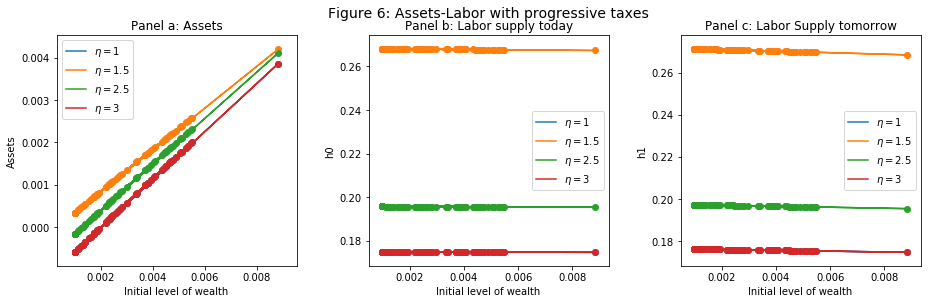

In [59]:
#PLOT
# Convert every output in an array
y0=np.asarray(y0)
assets_t1=np.asarray(assets_t1)
assets_t2=np.asarray(assets_t2)
assets_t3=np.asarray(assets_t3)
assets_t4=np.asarray(assets_t4)
T0_t1=np.asarray(T0_t1)
T0_t2=np.asarray(T0_t2)
T0_t3=np.asarray(T0_t3)
T0_t4=np.asarray(T0_t4)
T1_t1=np.asarray (T1_t1)
T1_t2=np.asarray (T1_t2)
T1_t3=np.asarray (T1_t3)
T1_t4=np.asarray (T1_t4)
h0_t1=np.asarray(h0_t1)
h0_t2=np.asarray(h0_t2)
h0_t3=np.asarray(h0_t3)
h0_t4=np.asarray(h0_t4)
h1_t1=np.asarray(h1_t1)
h1_t2=np.asarray(h1_t2)
h1_t3=np.asarray(h1_t3)
h1_t4=np.asarray(h1_t4)

plt.figure(1)
plt.suptitle('Figure 6: Assets-Labor with progressive taxes', x=1, y=1, fontsize=14)

plt.subplot(131)
plt.plot(y0, assets_t1, label='$\eta=1$')
plt.plot(y0, assets_t2, label='$\eta=1.5$')
plt.plot(y0, assets_t3, label='$\eta=2.5$')
plt.plot(y0, assets_t4, label='$\eta=3$')
plt.scatter(y0,assets_t1)
plt.scatter(y0,assets_t2)
plt.scatter(y0,assets_t3)
plt.scatter(y0,assets_t4)
plt.xlabel('Initial level of wealth')
plt.ylabel('Assets')
plt.title('Panel a: Assets')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, h0_t1, label='$\eta=1$')
plt.plot(y0, h0_t2, label='$\eta=1.5$')
plt.plot(y0, h0_t3, label='$\eta=2.5$')
plt.plot(y0, h0_t4, label='$\eta=3$')
plt.scatter(y0,h0_t1)
plt.scatter(y0,h0_t2)
plt.scatter(y0,h0_t3)
plt.scatter(y0,h0_t4)
plt.xlabel('Initial level of wealth')
plt.ylabel('h0')
plt.title('Panel b: Labor supply today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(133)
plt.plot(y0, h1_t1, label='$\eta=1$')
plt.plot(y0, h1_t2, label='$\eta=1.5$')
plt.plot(y0, h1_t3, label='$\eta=2.5$')
plt.plot(y0, h1_t4, label='$\eta=3$')
plt.scatter(y0,h1_t1)
plt.scatter(y0,h1_t2)
plt.scatter(y0,h1_t3)
plt.scatter(y0,h1_t4)
plt.xlabel('Initial level of wealth')
plt.ylabel('h1')
plt.title('Panel c: Labor Supply tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)
             
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

With progressive taxation there are less people indebted, which is a good achievement of the tax system. However, the labor supply is much lower both today and tomorrow, meaning that the tax system is hurting the incentives to work. 

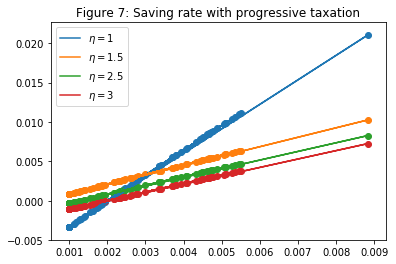

In [60]:
#Get the savings
#eta=1
savings_1=[]
for i in range(0,100) :
    eta=1
    s_1 = assets_t1[i]/(y0[i]+eta*h0_t1[i])
    savings_1.append(s_1)

#eta=1.5
savings_2=[]
for i in range(0,100) :
    eta=1.5
    s_2 = assets_t2[i]/(y0[i]+eta*h0_t2[i])
    savings_2.append(s_2)

#eta=2.5
savings_3=[]
for i in range(0,100) :
    eta=2.5
    s_3 = assets_t3[i]/(y0[i]+eta*h0_t3[i])
    savings_3.append(s_3)
    
#eta=3
savings_4=[]
for i in range(0,100) :
    eta=3
    s_4 = assets_t4[i]/(y0[i]+eta*h0_t4[i])
    savings_4.append(s_4)

#PLOT

plt.plot(y0, savings_1, label='$\eta=1$')
plt.plot(y0, savings_2, label='$\eta=1.5$')
plt.plot(y0, savings_3, label='$\eta=2.5$')
plt.plot(y0, savings_4, label='$\eta=3$')
plt.scatter(y0,savings_1)
plt.scatter(y0,savings_2)
plt.scatter(y0,savings_3)
plt.scatter(y0,savings_4)
plt.title('Figure 7: Saving rate with progressive taxation')
plt.legend()